SSD OF THE IMAGE:

 [[49030204. 45731920. 46316628. ... 43510588. 44977090. 46075584.]
 [48286748. 46086704. 46355664. ... 44164028. 44565110. 45456260.]
 [46907036. 44317016. 44395664. ... 44785244. 43915670. 45030444.]
 ...
 [27597506. 27697292. 27731120. ... 57623200. 58122830. 58408556.]
 [27419856. 27350814. 27415146. ... 58742084. 58894908. 58804450.]
 [27102218. 26759120. 26730918. ... 57259970. 56498176. 56193536.]]


Minimum Location:  (1258, 74)  ||| Value:  29669.0


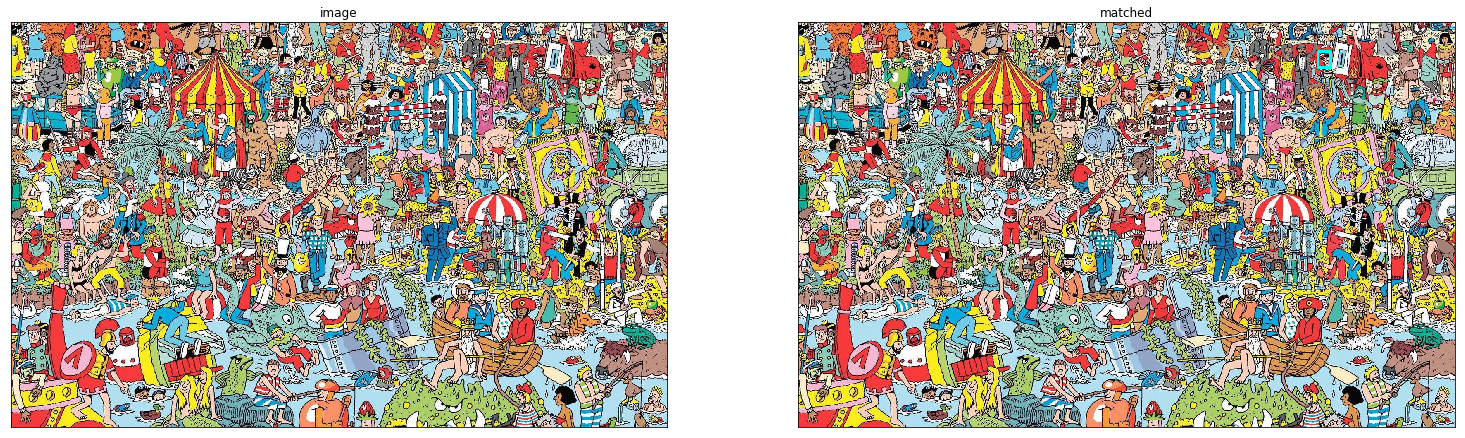



NOISY TEMPLATE


SSD OF THE IMAGE:

 [[49611630. 46151944. 46806276. ... 43817364. 45158516. 46240670.]
 [48759530. 46379796. 46778610. ... 44598400. 44886804. 45748852.]
 [47344532. 44781176. 44803044. ... 45314892. 44426984. 45505400.]
 ...
 [28761536. 28817948. 28921276. ... 57633748. 58041644. 58425624.]
 [28629884. 28583428. 28501912. ... 58752850. 58918144. 58755336.]
 [28293656. 27982784. 27826332. ... 57437150. 56870600. 56825292.]]


Minimum Location:  (1258, 74)  ||| Value:  2010579.0


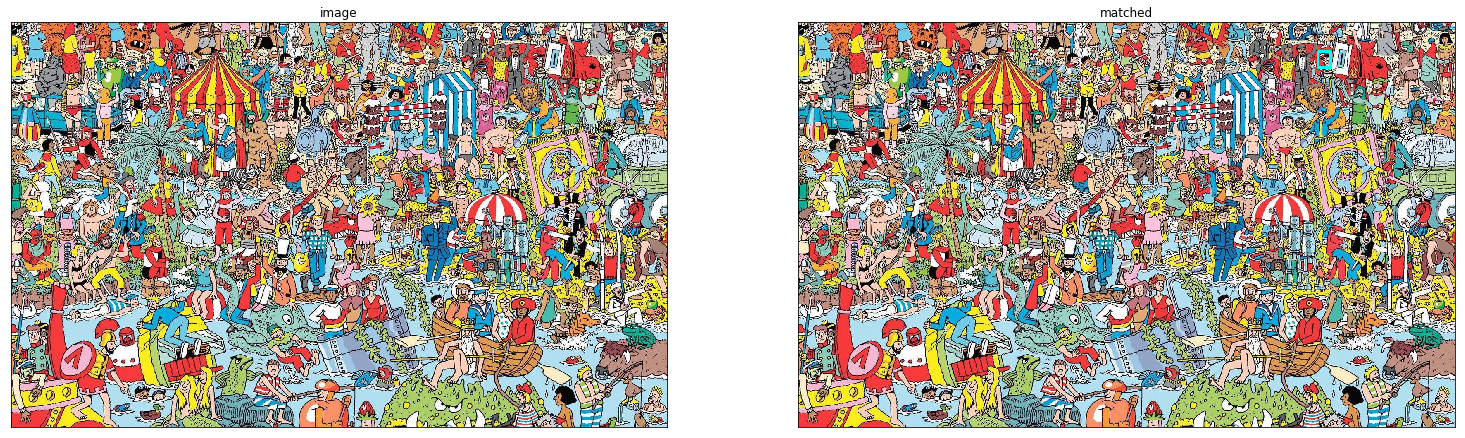

In [93]:
##############################
# MATCH IS FOUND IN BLUE BOX #
##############################

#method for template matching using SQDIFF
def template_matching(image, template):
    #first copy to draw a rectangle of the match on
    #second copy to display original image without rectangle
    img = image.copy()
    imgOriginal = image.copy()
    
    #use sum of squared distance method provided by CV2
    res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
    print ("SSD OF THE IMAGE:\n\n", res)
    
    #find min and max values in the resulting matrix
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    top_left = min_loc
    
    #print location and value of the minimum
    print("\n\nMinimum Location: ", top_left, " ||| Value: ", res[top_left[1]][top_left[0]])
    
    #draw a rectangle around the match
    h, w = template.shape[0:2]
    bottom_right = (top_left[0] + w, top_left[1]+h)
    cv2.rectangle(img, top_left, bottom_right, (255,255,0), 5)
    
    #convert to RGB to display
    imgOriginal = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #plot 
    plt.figure(figsize=(40, 40)) 
    plt.subplot(131), plt.imshow(imgOriginal)
    plt.title("image"), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img)
    plt.title("matched"), plt.xticks([]), plt.yticks([])
    plt.show()

    
###########################################################################
#call the method on the template without noise
template_matching(cv2.imread('where_is_waldo.jpg'), cv2.imread('template1.png'))

print("=============================================================================================================")
print("\n\nNOISY TEMPLATE\n\n")

#call the method on the template with noise
template_matching(cv2.imread('where_is_waldo.jpg'), cv2.imread('template2.png'))
